# Netflix EDA Project

This project explores the Netflix Titles dataset to understand trends in content types, durations, countries, and release years.


### Step 1: Load the Libraries and  Dataset
We begin by importing libraries and loading the Netflix dataset. This gives us a sense of the data structure and helps identify any cleaning needed.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("netflix.csv")



# Step 2: Preview and Understand the Data

We begin by checking the structure of the dataset using `info()` and `isnull().sum()`. This helps us identify missing values, understand data types, and get an overview of the dataset's shape and schema.


In [9]:
df.info()
df.head()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   date_added.1  8797 non-null   object
 8   release_year  8807 non-null   int64 
 9   rating        8803 non-null   object
 10  duration      8804 non-null   object
 11  listed_in     8807 non-null   object
 12  description   8807 non-null   object
dtypes: int64(1), object(12)
memory usage: 894.6+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
date_added.1      10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# 🧹 Step 3: Clean the Data

In this step, we clean the dataset by:
- Dropping irrelevant columns (`description`)
- Handling missing values (using `dropna()` for simplicity)
- Converting date columns to datetime format

This prepares the data for meaningful analysis.


In [16]:
# Drop unnecessary columns
df = df.drop(columns=['description'])

# Drop rows with missing values (or handle differently if preferred)
df = df.dropna()




KeyError: "['description'] not found in axis"

# 🔁 Step 4: Transform the Data

Here, we extract more useful features from existing columns:
- Extract `year` and `month` from the `date_added` column
- Create a numeric `duration_minutes` column from the `duration` text
These transformations make it easier to analyze trends and durations.


In [14]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month




# 📊 Step 5: Visualize the Data

We use `seaborn` and `matplotlib` to explore the data visually:
- Distribution of content types (Movies vs TV Shows)
- Trends over time
- Content by country
- Duration analysis
These plots help uncover patterns not easily seen in raw tables.


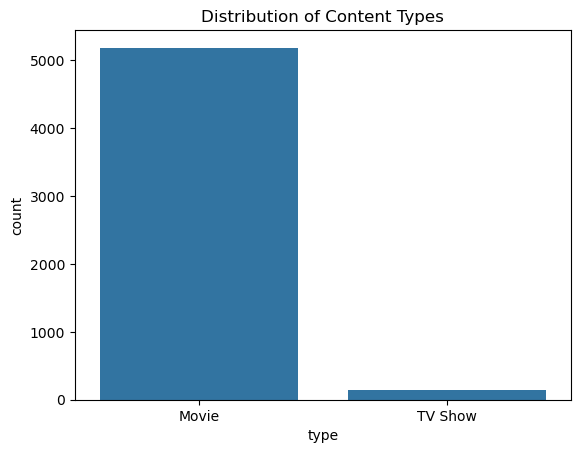

In [5]:
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Types")
plt.show()


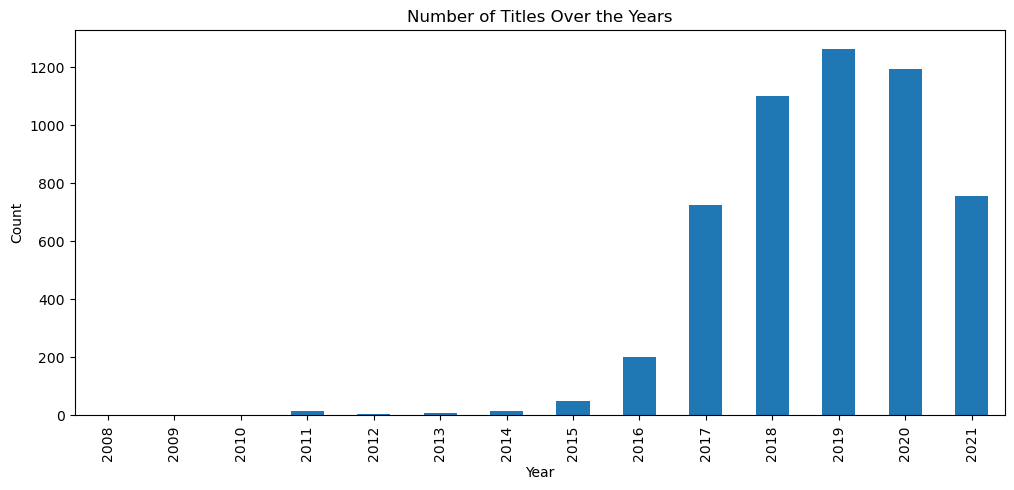

In [6]:
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title("Number of Titles Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


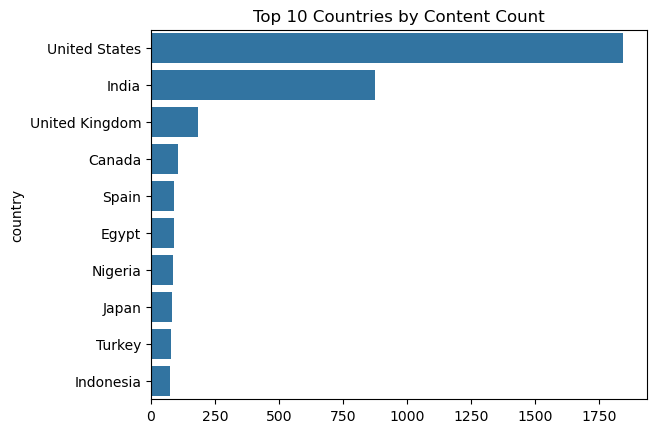

In [7]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Content Count")
plt.show()


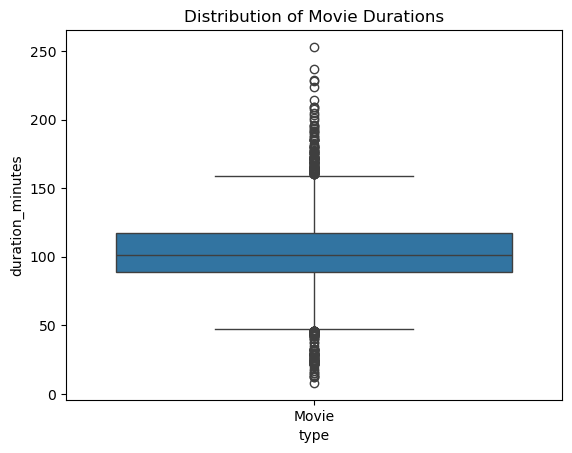

In [8]:
movies = df[df['type'] == 'Movie']
sns.boxplot(x='type', y='duration_minutes', data=movies)
plt.title("Distribution of Movie Durations")
plt.show()


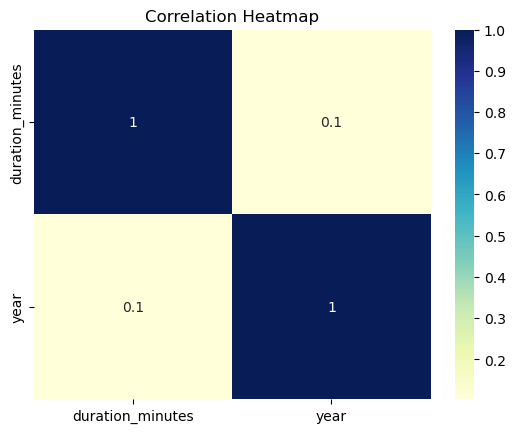

In [9]:
sns.heatmap(df[['duration_minutes', 'year']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()


# 🧠 Summary & Key Insights

- **Movies dominate** the Netflix catalog compared to TV Shows.
- **Content growth peaked** between 2018–2020, possibly due to expansion efforts.
- **United States** is the top content producer, followed by India and the UK.
- **Most movies** are under 100 minutes, but there are outliers with longer durations.
- The **data was mostly clean**, but some missing values were present and dropped.




In [10]:
df.to_csv("cleaned_netflix.csv", index=False)
